In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import AdamW

from sklearn.metrics import confusion_matrix , classification_report


In [2]:
df = pd.read_csv("Airline_Delay_Cause.csv")
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [4]:
df.isna().sum()

year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64

In [5]:
df.dropna(inplace = True)
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [6]:
df.shape

(317261, 21)

In [7]:
df.drop(columns = ["airport" , "airport_name","carrier_name","carrier"] ,inplace = True)

In [8]:
df.columns

Index(['year', 'month', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled',
       'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [9]:
df.shape

(317261, 17)

In [10]:
df

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [11]:
def Value(x):
    if x <=30 :
        return 0
    elif x <= 100:
        return 1 
    elif x <= 200:
        return 2
    else :
        return 3

In [12]:
df["WCase"] = df["weather_delay"].apply(lambda x : Value(x))

In [13]:
df["WCase"].value_counts()

WCase
0    164984
3     68251
1     50127
2     33899
Name: count, dtype: int64

In [14]:
X = df.drop(["WCase"], axis = 1)
y = df["WCase"]

In [15]:
y_cat = tf.keras.utils.to_categorical(y)

In [21]:
X_train , X_test, y_train , y_test = train_test_split(X,y_cat,test_size=0.25 , random_state=42 , shuffle=True)

In [22]:
print("X_train_shape is : " , X_train.shape)
print("X_test_shape is : " , X_test.shape)
print("y_train_shape is : " , y_train.shape)
print("y_test_shape is : " , y_test.shape)

X_train_shape is :  (237945, 17)
X_test_shape is :  (79316, 17)
y_train_shape is :  (237945, 4)
y_test_shape is :  (79316, 4)


In [23]:
KerasModel = keras.models.Sequential([
    keras.layers.Dense(8,activation='tanh'),
    keras.layers.Dense(128,activation='tanh'),
    keras.layers.Dense(64,activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4, activation='softmax')
    
])

In [24]:
KerasModel.compile(optimizer = 'adam', loss = "categorical_crossentropy" , metrics = ['accuracy'])

In [25]:
history = KerasModel.fit(
    X_train , 
    y_train,
    validation_data=(X_test, y_test),
    epochs = 100,
    batch_size= 10000,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        patience=5,
        monitor="val_accuracy",
        restore_best_weights=True
    )]
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5978 - loss: 1.0389 - val_accuracy: 0.6822 - val_loss: 0.8395
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6830 - loss: 0.8382 - val_accuracy: 0.6935 - val_loss: 0.7938
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6947 - loss: 0.7945 - val_accuracy: 0.7061 - val_loss: 0.7586
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7062 - loss: 0.7571 - val_accuracy: 0.7152 - val_loss: 0.7265
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7114 - loss: 0.7275 - val_accuracy: 0.7252 - val_loss: 0.6876
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7267 - loss: 0.6812 - val_accuracy: 0.7342 - val_loss: 0.6311
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7302 - loss: 0.6311 - val_accuracy: 0.7493 - val_loss: 0.6012
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7477 - loss: 0.6008 - val_accuracy: 0.

In [26]:
print(KerasModel.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,438 (115.00 KB)

 Trainable params: 9,812 (38.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,626 (76.67 KB)

None


In [27]:
KerasModel.save('KerasModel.keras')

In [29]:
NewKerasModel = keras.models.load_model("KerasModel.keras")

In [30]:
y_pred = NewKerasModel.predict(X_test)

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [34]:
print('Prediction Shape is {}'.format(y_pred.shape))
print('*' *40)
print('Prediction items are {}'.format(y_pred[:5]))
print('*' *40)
y_pred[:10]

Prediction Shape is (79316, 4)
****************************************
Prediction items are [[5.3061129e-08 8.3810382e-06 1.8339939e-03 9.9815756e-01]
 [1.2395207e-03 9.9343634e-01 5.3129173e-03 1.1235995e-05]
 [1.6339390e-04 3.9448592e-01 6.0447687e-01 8.7387144e-04]
 [9.9983084e-01 1.6832280e-04 8.3393547e-07 7.3702502e-09]
 [4.6321729e-06 7.8127980e-03 9.8947525e-01 2.7073226e-03]]
****************************************


array([[5.3061129e-08, 8.3810382e-06, 1.8339939e-03, 9.9815756e-01],
       [1.2395207e-03, 9.9343634e-01, 5.3129173e-03, 1.1235995e-05],
       [1.6339390e-04, 3.9448592e-01, 6.0447687e-01, 8.7387144e-04],
       [9.9983084e-01, 1.6832280e-04, 8.3393547e-07, 7.3702502e-09],
       [4.6321729e-06, 7.8127980e-03, 9.8947525e-01, 2.7073226e-03],
       [4.6321729e-06, 7.8127980e-03, 9.8947525e-01, 2.7073226e-03],
       [5.3061129e-08, 8.3810382e-06, 1.8339939e-03, 9.9815756e-01],
       [5.3061129e-08, 8.3810382e-06, 1.8339939e-03, 9.9815756e-01],
       [4.6325540e-06, 7.8135971e-03, 9.8947453e-01, 2.7072418e-03],
       [1.2395207e-03, 9.9343634e-01, 5.3129173e-03, 1.1235995e-05]],
      dtype=float32)

In [35]:
ModelLoss , ModelAccuracy = NewKerasModel.evaluate(X_test,y_test)
print("Model Loss is {}".format(ModelLoss))
print("*"*60)
print("Model Accurcy is {}".format(ModelAccuracy))
print('*' * 60)
print(history.history.keys())

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9941 - loss: 0.0248
Model Loss is 0.02489008568227291
************************************************************
Model Accurcy is 0.9939356446266174
************************************************************
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


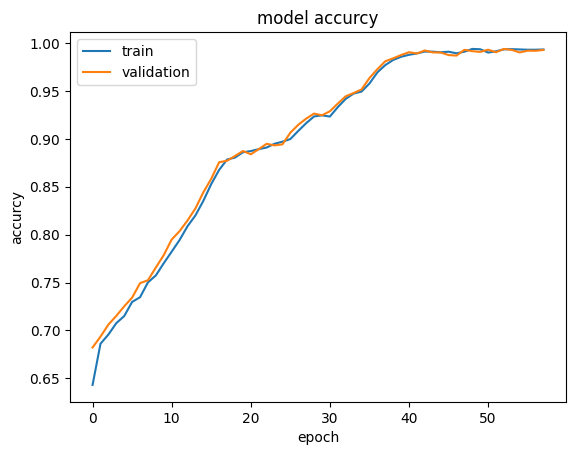

In [38]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accurcy")
plt.xlabel("epoch")
plt.ylabel("accurcy")
plt.legend(["train","validation"], loc = "upper left")
plt.show()

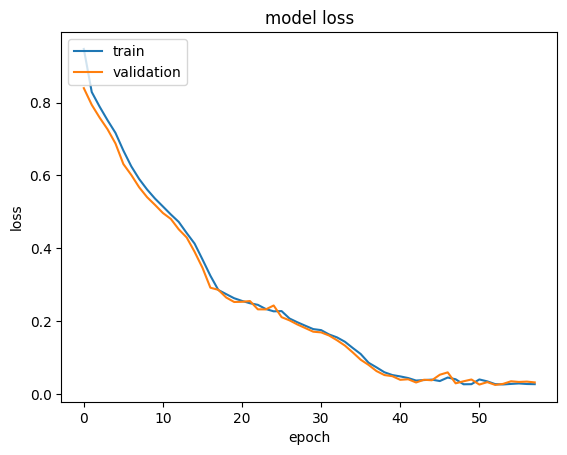

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","validation"], loc = 'upper left')
plt.show()

In [40]:
len(y_pred) , len(y_test)

(79316, 79316)

In [41]:
y_pred

array([[5.3061129e-08, 8.3810382e-06, 1.8339939e-03, 9.9815756e-01],
       [1.2395207e-03, 9.9343634e-01, 5.3129173e-03, 1.1235995e-05],
       [1.6339390e-04, 3.9448592e-01, 6.0447687e-01, 8.7387144e-04],
       ...,
       [9.9983084e-01, 1.6832248e-04, 8.3393468e-07, 7.3702360e-09],
       [9.9983084e-01, 1.6832248e-04, 8.3393468e-07, 7.3702360e-09],
       [9.9983084e-01, 1.6832264e-04, 8.3393547e-07, 7.3702502e-09]],
      dtype=float32)

In [42]:
y_test

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [44]:
new_y_pred = [np.argmax(i) for i in  y_pred]
new_y_test = [np.argmax(i) for i in  y_test]
print(new_y_pred[:30])
print('*'*40)
print(new_y_test[:30])

[3, 1, 2, 0, 2, 2, 3, 3, 2, 1, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 2, 1, 0, 2, 0, 0, 0, 0, 3, 3]
****************************************
[3, 1, 1, 0, 2, 2, 3, 3, 1, 1, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 2, 1, 0, 2, 0, 0, 0, 0, 3, 3]


In [47]:
CM = confusion_matrix(new_y_test,new_y_pred)
print("Confusion Matrix is : \n", CM)

Confusion Matrix is : 
 [[41160    11     0     0]
 [   39 12272   184     0]
 [    0    27  8519    26]
 [    0     0   194 16884]]


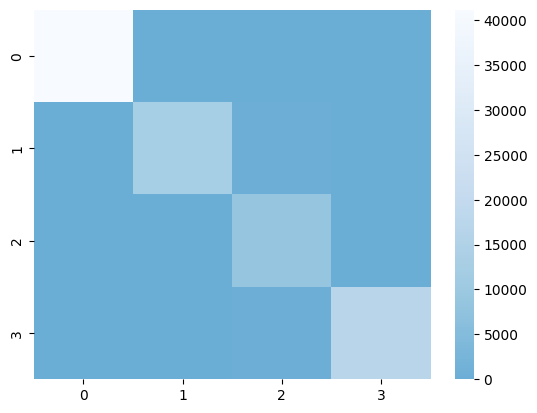

In [50]:
sns.heatmap(CM , center = True , cmap  ="Blues_r")
plt.show()

In [53]:
Classification_report = classification_report(new_y_test,new_y_pred)
print("Classification_report is : \n" , Classification_report)

Classification_report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41171
           1       1.00      0.98      0.99     12495
           2       0.96      0.99      0.98      8572
           3       1.00      0.99      0.99     17078

    accuracy                           0.99     79316
   macro avg       0.99      0.99      0.99     79316
weighted avg       0.99      0.99      0.99     79316

